In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# 1. 데이터 파악

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived - 0:사망, 1: 생존 <br> 
Pclass - 등실 등급 <br>
SibSp - 함께 탑승한 형제자매, 아내, 남편의 수 <br>
Parch - 함께 탑승한 부모, 자식의 수 <br>
Cabin - 객실 번호 <br>
Embarked - 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton) <br>

In [4]:
#정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

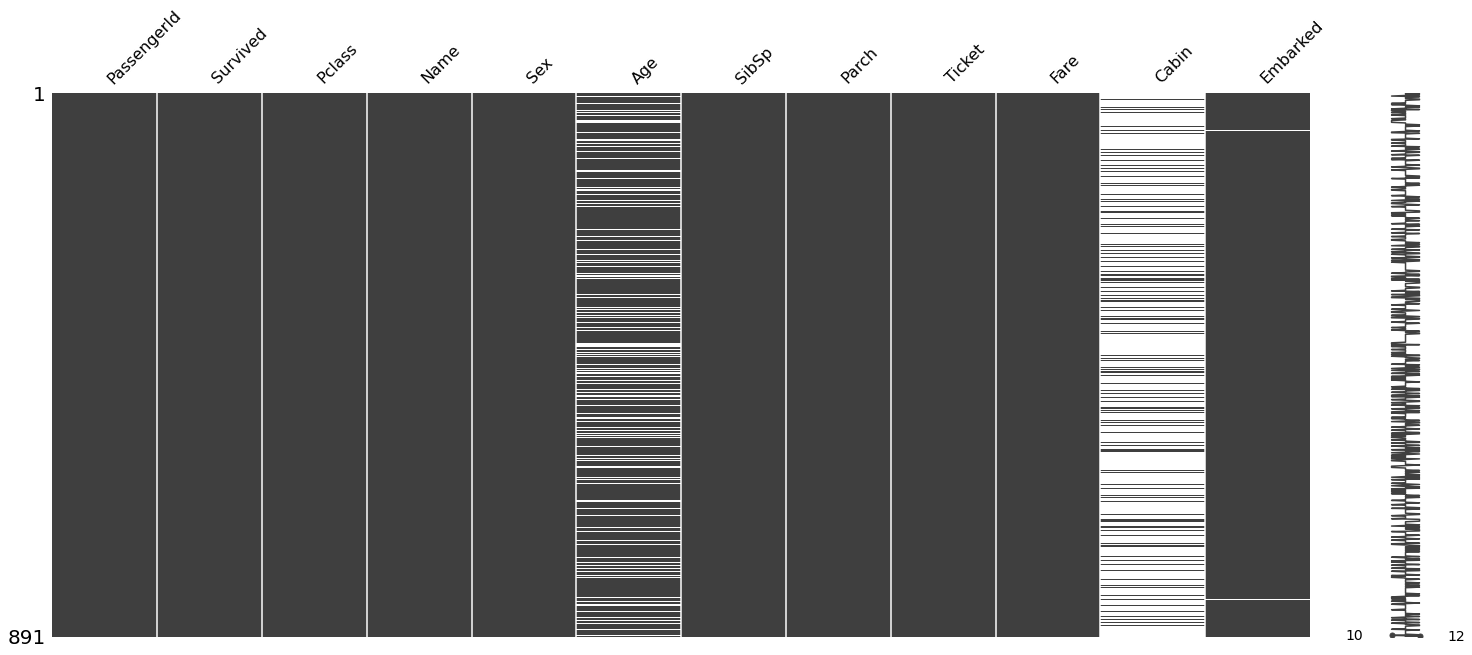

In [6]:
#결측치 확인
msno.matrix(train)

In [7]:
#데이터셋 분포 양상
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

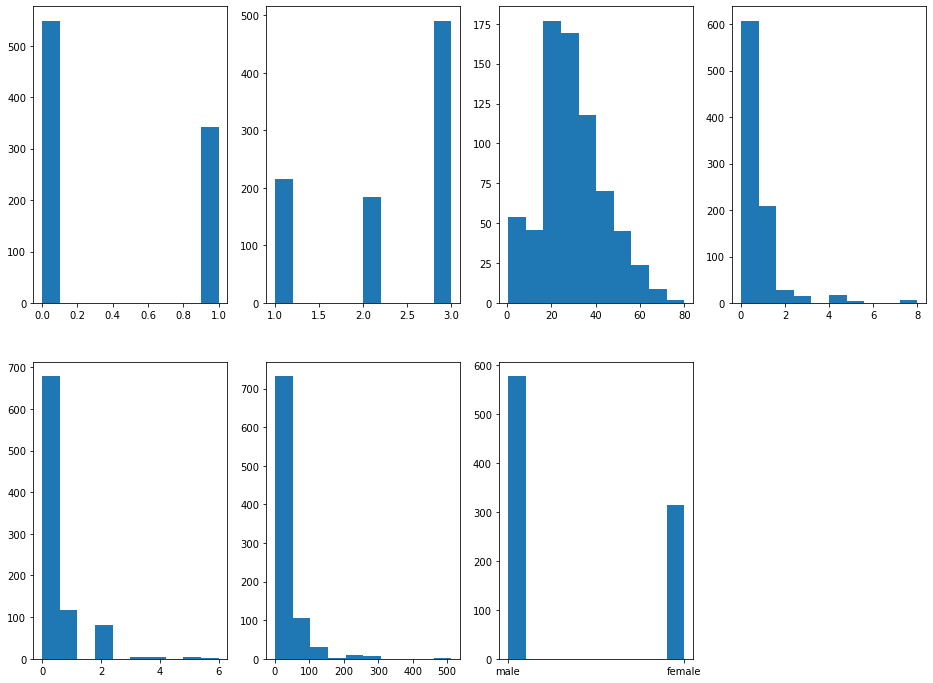

In [8]:
plt.figure(figsize=[16,12])

plt.subplot(241)
plt.hist(x=train['Survived'])

plt.subplot(242)
plt.hist(x=train['Pclass'])

plt.subplot(243)
plt.hist(x=train['Age'])

plt.subplot(244)
plt.hist(x=train['SibSp'])

plt.subplot(245)
plt.hist(x=train['Parch'])

plt.subplot(246)
plt.hist(x=train['Fare'])

plt.subplot(247)
plt.hist(x=train['Sex'])

1. 60%의 승객이 사망
2. 절반 이상이 3등급 등실
3. 청,장년층에 승객 분포
4. 함께 탑승한 형제자매, 아내, 남편의 수가 적은 편
5. 함께 탑승한 부모, 자식의 수가 적은 편
- 그러나 부모-자식의 승객보다는 부부,형제관계의 승객이 많다.
6. 저가의 요금을 지불한 승객이 많다
7. 남성 승객이 여성 승객보다 많다

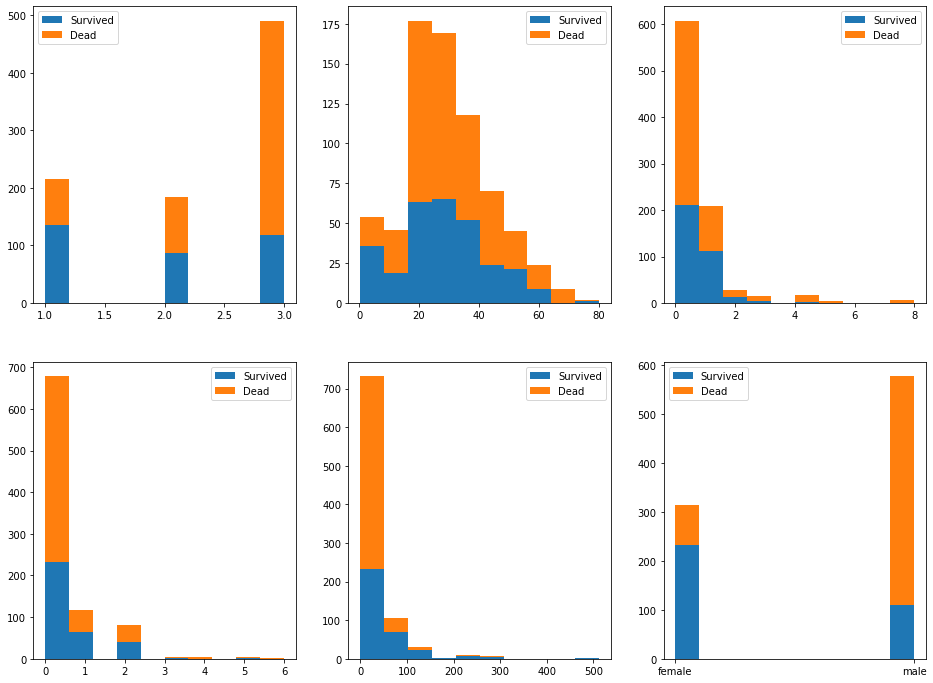

In [9]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.hist(x=[train[train['Survived']==1]['Pclass'],train[train['Survived']==0]['Pclass']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

plt.subplot(232)
plt.hist(x=[train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

plt.subplot(233)
plt.hist(x=[train[train['Survived']==1]['SibSp'],train[train['Survived']==0]['SibSp']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

plt.subplot(234)
plt.hist(x=[train[train['Survived']==1]['Parch'],train[train['Survived']==0]['Parch']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

plt.subplot(235)
plt.hist(x=[train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

plt.subplot(236)
plt.hist(x=[train[train['Survived']==1]['Sex'],train[train['Survived']==0]['Sex']],
         stacked=True,label=['Survived','Dead'])
plt.legend()

1. 1,2등석은 생존률이 비슷하나 3등석은 사망률이 월등히 높음
2. 청,장년층의 사망률이 높음. 80대와 10대 미만의 아이들은 생존률이 높은 것으로 보아 노약자 구조에 우선한 것으로 생각됨
3. 본인 외 가족과 동반해 온 사람들의 분포를 살펴보면 혼자 탑승한 승객은 사망률이 높음. 그러나 동반인이 있는 경우 그 수에 관계 없이 절반의 확률로 생존함
4. 요금을 많이 지불한 승객이 높은 확률로 생존함
5. 여성이 남성보다 많이 생존함

# 2. 전처리 및 결측치 처리

### 0) 전반적 전처리

- train : Age, Fare, Cabin에서 결측치 존재

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- test : Age, Fare, Cabin에서 결측치 존재

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 통일된 전처리를 위해 train과 test를 합친다

In [12]:
df=pd.concat([train,test]).reset_index(drop=True)

In [13]:
sex_mapping={'male':1,'female':2}
df['Sex']=df['Sex'].map(sex_mapping)

- 정규 표현식을 사용해서 자르려고 했는데 concat한 df에서 안됨

In [14]:
# for dataset in df:
#     dataset['NameTitle']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)
# p=re.compile('([A-Za-z]+)\.')
# df['Nametitle']=p.search(df['Name'])
# df['NameTitle']=df['Name'].apply(lambda x: df['Name'].str.extract('([A-Za-z]+)\.'))

In [15]:
df['NameTitle'] = df['Name'].apply(lambda x: x.split(',')[1].strip().split('.')[0])

In [16]:
df['NameTitle'].value_counts()
# #Q. 왜 df['Nametitle은 안되지?'] - List 형태에서만 가능한거였음

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Major             2
Ms                2
Mme               1
Capt              1
Dona              1
Lady              1
the Countess      1
Don               1
Jonkheer          1
Sir               1
Name: NameTitle, dtype: int64

- 호칭에 따른 연령 분포 산점도 그래프

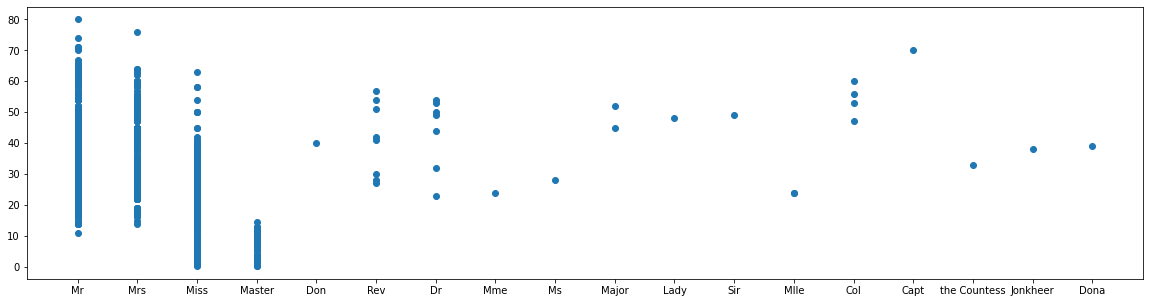

In [17]:
plt.figure(figsize=(20,5))
plt.scatter(df['NameTitle'],df['Age'])

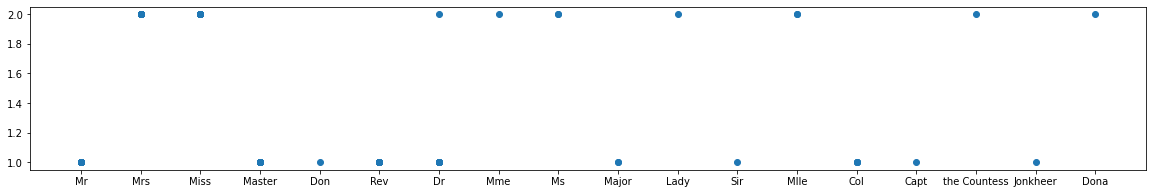

In [18]:
plt.figure(figsize=(20,3))
plt.scatter(df['NameTitle'],df['Sex'])

- Mr(0) : Dr, Rev, Major,Col,Jonkheer, Countess,Sir, Don, Capt, Master
- Miss(1) : Mile, Ms, Mme, 
- Mrs(2) : Lady,Dona

In [19]:
title_mapping={
'Mr':0,
'Miss':1,
'Mrs':2,
'Master':0,
'Dr':3,
'Rev':0,
'Major':0,
'Mlle':1,
'Col':0,
'Jonkheer':0,
'Ms':1,
'Mme':1,
'the Countess':0,
'Sir':0,
'Don':0,
'Capt':0,
'Lady':2,
'Dona':2
}

실패의 흔적들.... ↓

In [20]:
# # for dataset in df:
# #     dataset['name_num']=dataset['NameTitle'].map(title_mapping)
# df=pd.DataFrame({'NameTitle':[
#     'Dr', 'Rev', 'Major','Col','Jonkheer', 'Countess','Sir', 'Don', 'Capt', 'Master','Mr',
#     'Miss','Mile', 'Ms', 'Mme',
#     'Mrs','Lady','Dona'],
#     'name_num':[0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2]})

In [21]:
df['name_num']=df['NameTitle'].map(title_mapping)

### 1) Age

##### *IDEA : 이름으로 나이를 유추할 수 있지 않을까?

- 각 NameTitle가 속한 Age의 중간값으로 결측값을 채움
* name_num으로 안하고 NameTitle로 한 이유 : Doctor, Master같은 경우 대표적 3 그룹에 포함시켜 하기엔 그 분포가 상당히 상이하기 때문

In [22]:
fill=df.groupby('NameTitle')['Age'].transform('median')
df['Age'].fillna(fill,inplace=True)

In [23]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
NameTitle         0
name_num          0
dtype: int64

### 2) Fare

In [24]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle,name_num
1043,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,NaN,NaN,S,Mr,0


In [25]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,name_num
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.024739,-0.055224,0.008942,0.031428,0.006648
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.071470,-0.035322,0.081629,0.257307,0.496532
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.391818,0.060832,0.018322,-0.558629,-0.190680
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.060438,0.109609,0.213125,0.185523,0.875297
Age,0.024739,-0.071470,-0.391818,-0.060438,1.000000,-0.214473,-0.129712,0.180892,0.099114
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.214473,1.000000,0.373587,0.160238,0.102467
Parch,0.008942,0.081629,0.018322,0.213125,-0.129712,0.373587,1.000000,0.221539,0.226988
Fare,0.031428,0.257307,-0.558629,0.185523,0.180892,0.160238,0.221539,1.000000,0.190953
name_num,0.006648,0.496532,-0.190680,0.875297,0.099114,0.102467,0.226988,0.190953,1.000000


##### *IDEA : Fare와 Pclass가 음의 상관관계가 있으므로 Pclass로 결측치를메꾼다

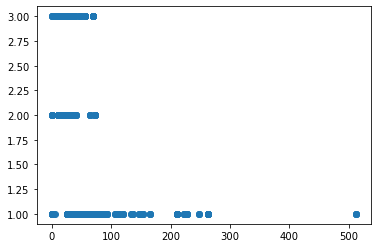

In [26]:
plt.scatter(df['Fare'],df['Pclass'])

In [27]:
fill=df.groupby('Pclass')['Fare'].transform('median')
df['Fare'].fillna(fill,inplace=True)

In [28]:
df.loc[df.index==1043]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle,name_num
1043,1044,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,3701,8.05,NaN,S,Mr,0


- Pclass가 3인 토마스씨는 3등석의 중간값인 약 8.05달러를 지불했을 것으로 추정

In [29]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
NameTitle         0
name_num          0
dtype: int64

In [30]:
# plt.scatter(train['Pclass'],train['Age'])
# sns.countplot(data=train,x='Pclass',hue='Age')

### 3) Embarked

In [31]:
emb_mapping={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(emb_mapping)

C:\Users\iryun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

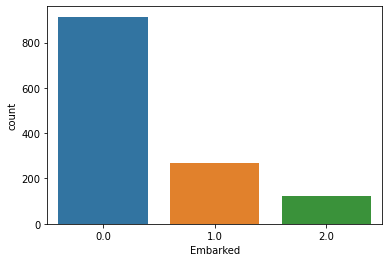

In [32]:
sns.countplot(df['Embarked'])

In [33]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_num
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.024739,-0.055224,0.008942,0.031029,0.039684,0.006648
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.071470,-0.035322,0.081629,0.257307,0.108669,0.496532
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.391818,0.060832,0.018322,-0.558740,0.037527,-0.190680
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.060438,0.109609,0.213125,0.185744,0.121868,0.875297
Age,0.024739,-0.071470,-0.391818,-0.060438,1.000000,-0.214473,-0.129712,0.179610,-0.002274,0.099114
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.214473,1.000000,0.373587,0.160388,-0.073937,0.102467
Parch,0.008942,0.081629,0.018322,0.213125,-0.129712,0.373587,1.000000,0.221668,-0.095975,0.226988
Fare,0.031029,0.257307,-0.558740,0.185744,0.179610,0.160388,0.221668,1.000000,0.062227,0.191157
Embarked,0.039684,0.108669,0.037527,0.121868,-0.002274,-0.073937,-0.095975,0.062227,1.000000,0.067044
name_num,0.006648,0.496532,-0.190680,0.875297,0.099114,0.102467,0.226988,0.191157,0.067044,1.000000


##### *IDEA :Embarked와 상관관계가 높은 것이 없다 -> 결측치를 최빈값인 0으로 넣어준다

In [34]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle,name_num
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,Miss,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,Mrs,2


In [35]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
NameTitle         0
name_num          0
dtype: int64

### 4) Cabin

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTitle,name_num
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1.0,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,0.0,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Mr,0


C:\Users\iryun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin', ylabel='count'>

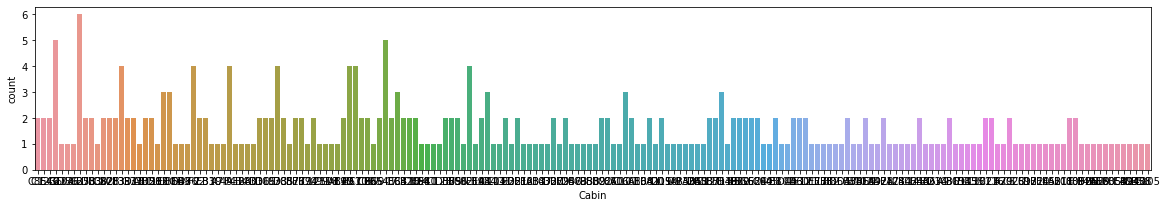

In [38]:
plt.figure(figsize=(20,3))
sns.countplot(df['Cabin'])

동일 좌석 번호를 여럿이 가진다 - 같은 팀으로 좌석을 예매할 경우 동일 좌석명으로 주는걸까?

In [39]:
df.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F2                 4
D                  4
                  ..
A21                1
A10                1
C49                1
F E46              1
B38                1
Name: Cabin, Length: 186, dtype: int64

In [40]:
df['Cabin_type']=df['Cabin'].str[:1]

In [41]:
df['Cabin_type'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
cab_mapping={'C':2, 'E':4, 'G':6, 'D':3, 'A':0, 'B':1, 'F':5, 'T':7}
df['Cabin_type_num']=df['Cabin_type'].map(cab_mapping)

C:\Users\iryun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cabin_type_num', ylabel='count'>

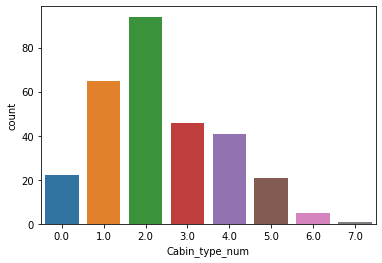

In [43]:
sns.countplot(df['Cabin_type_num'])

In [44]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_num,Cabin_type_num
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.024739,-0.055224,0.008942,0.031029,0.040143,0.006648,-0.061952
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.071470,-0.035322,0.081629,0.257307,0.106811,0.496532,0.018825
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.391818,0.060832,0.018322,-0.558740,0.038875,-0.190680,0.610843
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.060438,0.109609,0.213125,0.185744,0.120423,0.875297,0.046212
Age,0.024739,-0.071470,-0.391818,-0.060438,1.000000,-0.214473,-0.129712,0.179610,-0.003711,0.099114,-0.215456
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.214473,1.000000,0.373587,0.160388,-0.073461,0.102467,-0.009289
Parch,0.008942,0.081629,0.018322,0.213125,-0.129712,0.373587,1.000000,0.221668,-0.095523,0.226988,0.007602
Fare,0.031029,0.257307,-0.558740,0.185744,0.179610,0.160388,0.221668,1.000000,0.061337,0.191157,-0.297525
Embarked,0.040143,0.106811,0.038875,0.120423,-0.003711,-0.073461,-0.095523,0.061337,1.000000,0.065749,-0.174626
name_num,0.006648,0.496532,-0.190680,0.875297,0.099114,0.102467,0.226988,0.191157,0.065749,1.000000,0.013063


- Pclass와 Cabin type num의 상관관계가 약 0.61로 매우 높다

<AxesSubplot:xlabel='Cabin_type_num', ylabel='count'>

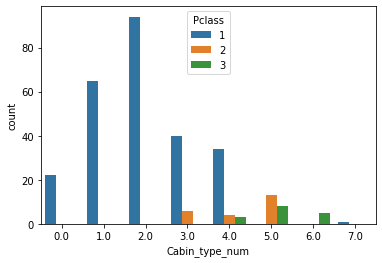

In [45]:
sns.countplot(x='Cabin_type_num',hue='Pclass',data=df)

'A':0, 'B':1,'C':2,'D':3,'E':4, 'F':5,'G':6,'T':7
-> A,B,C,D,E,T : 1등석 / D,E,F : 2등석 / E,F,G : 3등석

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1309 non-null   int64  
 1   Survived        891 non-null    float64
 2   Pclass          1309 non-null   int64  
 3   Name            1309 non-null   object 
 4   Sex             1309 non-null   int64  
 5   Age             1309 non-null   float64
 6   SibSp           1309 non-null   int64  
 7   Parch           1309 non-null   int64  
 8   Ticket          1309 non-null   object 
 9   Fare            1309 non-null   float64
 10  Cabin           295 non-null    object 
 11  Embarked        1309 non-null   float64
 12  NameTitle       1309 non-null   object 
 13  name_num        1309 non-null   int64  
 14  Cabin_type      295 non-null    object 
 15  Cabin_type_num  295 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 163.8+ KB


1309개 데이터 중 1014개의 결측치 - > 약 77%의 결측치 <br>
Pclass와 상관성은 높지만 그것 만으로는 대체하기 어려워 제외한다.

In [47]:
df=df.drop(columns=["Cabin_type","Cabin_type_num","Name","Cabin"])

# 3. EDA

In [48]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,name_num
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,0.0,Mr,0
1,2,1.0,1,2,38.0,1,0,PC 17599,71.2833,1.0,Mrs,2
2,3,1.0,3,2,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,1
3,4,1.0,1,2,35.0,1,0,113803,53.1000,0.0,Mrs,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,0.0,Mr,0


데이터셋 분포 양상

In [49]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name_num
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,1.355997,29.432521,0.498854,0.385027,33.276193,0.394194,0.524828
std,378.020061,0.486592,0.837836,0.478997,13.163767,1.041658,0.865560,51.743584,0.653499,0.768474
min,1.000000,0.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,982.000000,1.000000,3.000000,2.000000,35.500000,1.000000,0.000000,31.275000,1.000000,1.000000
max,1309.000000,1.000000,3.000000,2.000000,80.000000,8.000000,9.000000,512.329200,2.000000,3.000000


Text(0.5, 1.0, 'name_num')

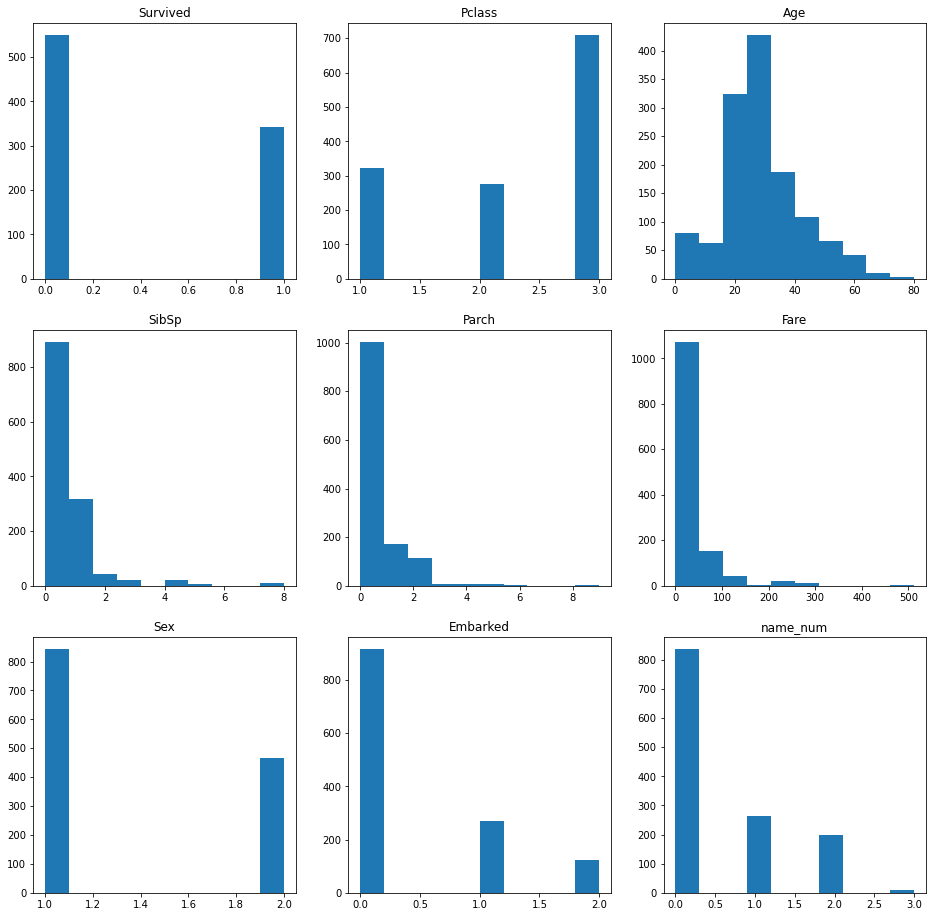

In [50]:
plt.figure(figsize=[16,16])

plt.subplot(331)
plt.hist(x=df['Survived'])
plt.title('Survived')

plt.subplot(332)
plt.hist(x=df['Pclass'])
plt.title('Pclass')

plt.subplot(333)
plt.hist(x=df['Age'])
plt.title('Age')

plt.subplot(334)
plt.hist(x=df['SibSp'])
plt.title('SibSp')


plt.subplot(335)
plt.hist(x=df['Parch'])
plt.title('Parch')


plt.subplot(336)
plt.hist(x=df['Fare'])
plt.title('Fare')


plt.subplot(337)
plt.hist(x=df['Sex'])
plt.title('Sex')


plt.subplot(338)
plt.hist(x=df['Embarked'])
plt.title('Embarked')


plt.subplot(339)
plt.hist(x=df['name_num'])
plt.title('name_num')

Text(0.5, 1.0, 'name_num')

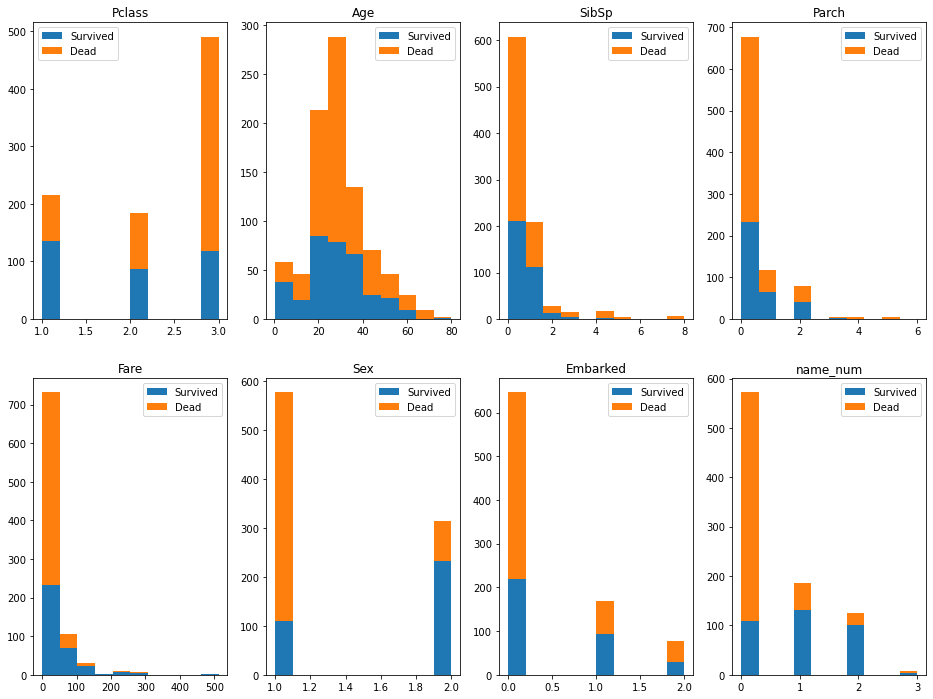

In [51]:
plt.figure(figsize=[16,12])

plt.subplot(241)
plt.hist(x=[df[df['Survived']==1]['Pclass'],df[df['Survived']==0]['Pclass']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Pclass')

plt.subplot(242)
plt.hist(x=[df[df['Survived']==1]['Age'],df[df['Survived']==0]['Age']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Age')


plt.subplot(243)
plt.hist(x=[df[df['Survived']==1]['SibSp'],df[df['Survived']==0]['SibSp']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('SibSp')


plt.subplot(244)
plt.hist(x=[df[df['Survived']==1]['Parch'],df[df['Survived']==0]['Parch']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Parch')


plt.subplot(245)
plt.hist(x=[df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Fare')


plt.subplot(246)
plt.hist(x=[df[df['Survived']==1]['Sex'],df[df['Survived']==0]['Sex']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Sex')


plt.subplot(247)
plt.hist(x=[df[df['Survived']==1]['Embarked'],df[df['Survived']==0]['Embarked']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('Embarked')


plt.subplot(248)
plt.hist(x=[df[df['Survived']==1]['name_num'],df[df['Survived']==0]['name_num']],
         stacked=True,label=['Survived','Dead'])
plt.legend()
plt.title('name_num')

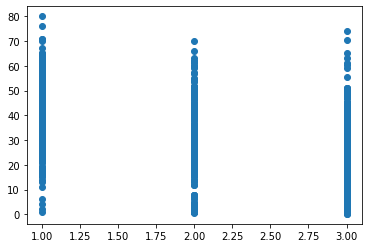

In [52]:
plt.scatter(df['Pclass'],df['Age'])

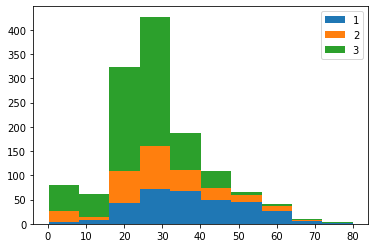

In [53]:
plt.hist(x=[df[df['Pclass']==1]['Age'],df[df['Pclass']==2]['Age'],df[df['Pclass']==3]['Age']],
         stacked=True,label=['1','2','3'])
plt.legend()

20대 미만은 1등석의 비율이 매우 적다 노년층일수록 1등석의 비율이 높다

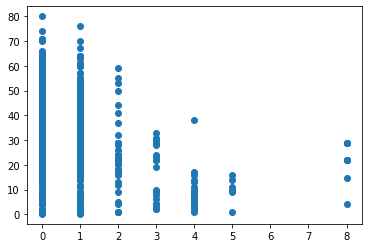

In [54]:
plt.scatter(df['SibSp'],df['Age'])

많은 사람과 동반해서 온 사람들일수록 고령자가 적다

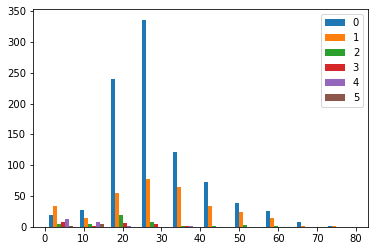

In [55]:
plt.figsize=(30,20)
plt.hist(x=[df[df['SibSp']==0]['Age'],df[df['SibSp']==1]['Age'],df[df['SibSp']==2]['Age'],
         df[df['SibSp']==3]['Age'],df[df['SibSp']==4]['Age'],df[df['SibSp']==5]['Age']],label=['0','1','2','3','4','5'])
plt.legend()

혼자 온 사람들은 20대 이상이 많으며 20대 미만의 사람들은 동반인이 많은 편.<br>
동반인이 있는 경우 2인1쌍으로 온 사람이 많다.

# 4. 이상치 탐색

In [56]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'NameTitle', 'name_num'],
      dtype='object')

In [57]:
df_train=df.loc[0:890]
df_test=df.loc[891:1309]

In [58]:
df_train.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,name_num
886,887,0.0,2,1,27.0,0,0,211536,13.00,0.0,Rev,0
887,888,1.0,1,2,19.0,0,0,112053,30.00,0.0,Miss,1
888,889,0.0,3,2,22.0,1,2,W./C. 6607,23.45,0.0,Miss,1
889,890,1.0,1,1,26.0,0,0,111369,30.00,1.0,Mr,0
890,891,0.0,3,1,32.0,0,0,370376,7.75,2.0,Mr,0


In [59]:
df_test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,name_num
891,892,NaN,3,1,34.5,0,0,330911,7.8292,2.0,Mr,0
892,893,NaN,3,2,47.0,1,0,363272,7.0000,0.0,Mrs,2
893,894,NaN,2,1,62.0,0,0,240276,9.6875,2.0,Mr,0
894,895,NaN,3,1,27.0,0,0,315154,8.6625,0.0,Mr,0
895,896,NaN,3,2,22.0,1,1,3101298,12.2875,0.0,Mrs,2


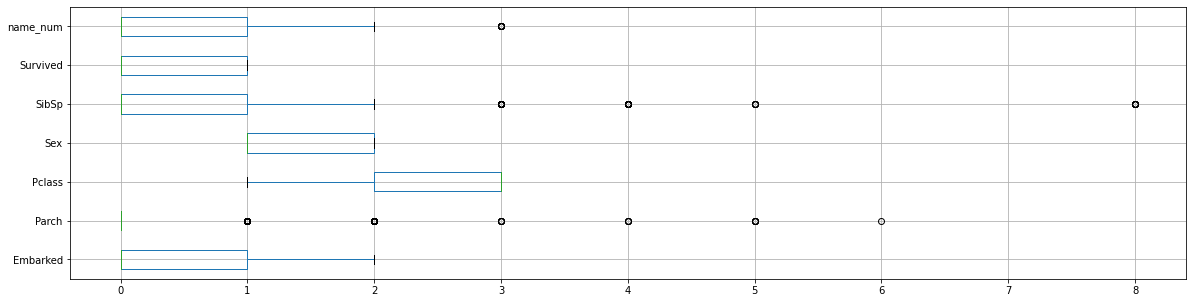

In [60]:
plt.figure(figsize=(20,5))
boxplot=df_train.boxplot(column=['Embarked', 'Parch','Pclass', 'Sex','SibSp', 'Survived', 'name_num'],vert=0)
#Fare, Age는 스케일이 너무 달라서 따로 뺌

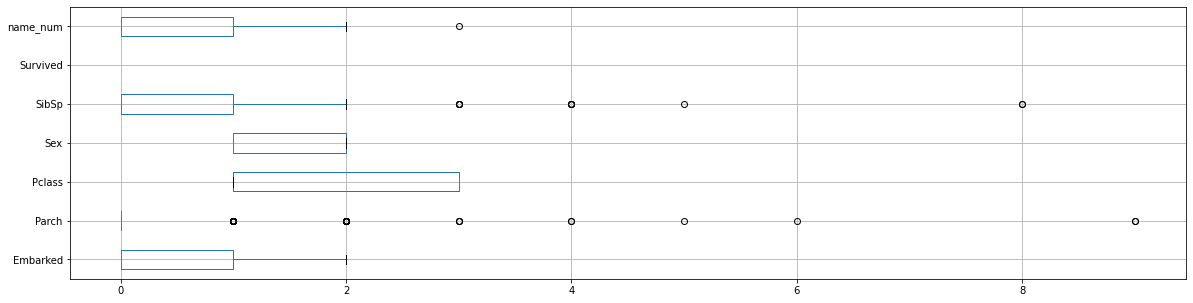

In [61]:
plt.figure(figsize=(20,5))
boxplot=df_test.boxplot(column=['Embarked', 'Parch','Pclass', 'Sex','SibSp', 'Survived', 'name_num'],vert=0)

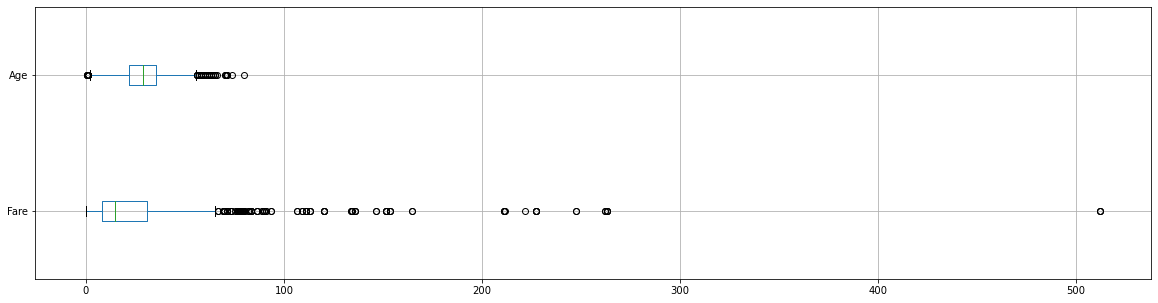

In [62]:
plt.figure(figsize=(20,5))
boxplot=df_train.boxplot(column=['Fare','Age'],vert=0)

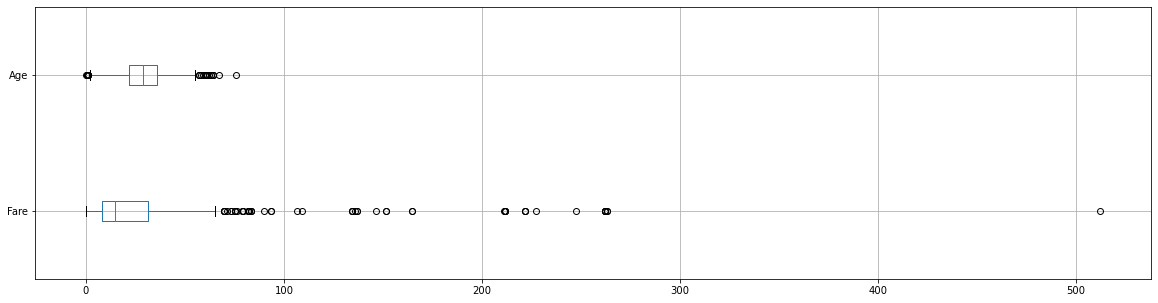

In [63]:
plt.figure(figsize=(20,5))
boxplot=df_test.boxplot(column=['Fare','Age'],vert=0)

500 이상 Fare가 각각 있는데 어떻게 하지..

In [64]:
pd.crosstab(df.SibSp,df.Parch)

Parch,0,1,2,3,4,5,6,9
SibSp,,,,,,,,
0,790,52,43,2,2,2,0,0
1,183,90,29,5,4,4,2,2
2,26,9,6,1,0,0,0,0
3,3,9,8,0,0,0,0,0
4,0,10,12,0,0,0,0,0
5,0,0,6,0,0,0,0,0
8,0,0,9,0,0,0,0,0


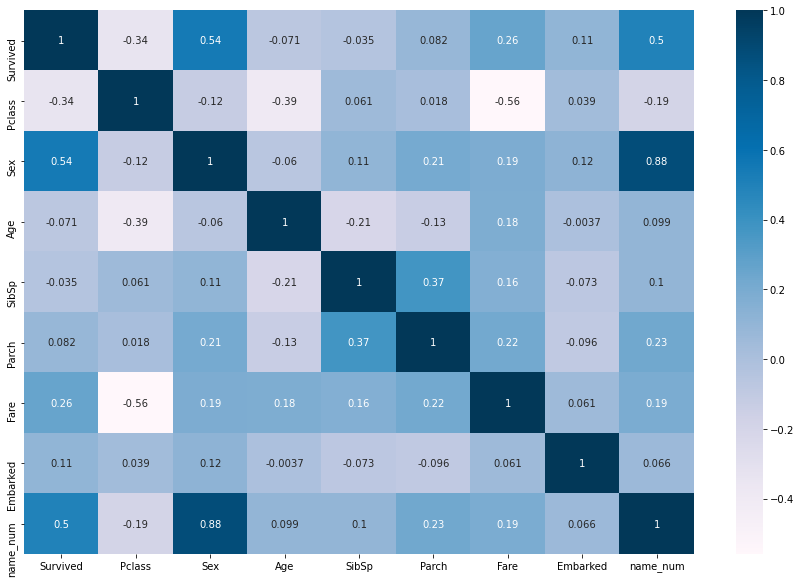

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('PassengerId',axis=1).corr(),annot=True,cmap='PuBu')
plt.show()

Fare-Pclass, Sex-name_num, Sex-Survived 의 상관관계가 높다 (0.5 이상)<br>
Parch-Sibsp 상관관계가 존재한다 (0.37)

# 5. 더미변수화 및 스케일링

In [66]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,name_num
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,0.0,Mr,0
1,2,1.0,1,2,38.0,1,0,PC 17599,71.2833,1.0,Mrs,2
2,3,1.0,3,2,26.0,0,0,STON/O2. 3101282,7.9250,0.0,Miss,1
3,4,1.0,1,2,35.0,1,0,113803,53.1000,0.0,Mrs,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,0.0,Mr,0


더미변수화 필요 : Embarked, Sex, name_num, Pclass <br>
제거 변수 : Ticket, NameTitle, PassengerId <br>
스케일링 필요 : Fare, Age

In [67]:
df_dummy=pd.get_dummies(data=df,columns=[ 'Embarked', 'Sex', 'name_num', 'Pclass']).drop(['Ticket', 'NameTitle', 'PassengerId'],axis=1)

In [68]:
df_dummy.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.0,1,0,7.2500,1,0,0,1,0,1,0,0,0,0,0,1
1,1.0,38.0,1,0,71.2833,0,1,0,0,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,7.9250,1,0,0,0,1,0,1,0,0,0,0,1
3,1.0,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0,1,0,0
4,0.0,35.0,0,0,8.0500,1,0,0,1,0,1,0,0,0,0,0,1


In [69]:
from sklearn.preprocessing import RobustScaler

scale=RobustScaler().fit(df_dummy[['Age','Fare']])
df_dummy[['Age','Fare']]=scale.transform(df_dummy[['Age','Fare']])

In [70]:
df_scaler=df_dummy
df_scaler.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3
0,0.0,-0.518519,1,0,-0.308146,1,0,0,1,0,1,0,0,0,0,0,1
1,1.0,0.666667,1,0,2.430755,0,1,0,0,1,0,0,1,0,1,0,0
2,1.0,-0.222222,0,0,-0.279274,1,0,0,0,1,0,1,0,0,0,0,1
3,1.0,0.444444,1,0,1.652999,1,0,0,0,1,0,0,1,0,1,0,0
4,0.0,0.444444,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1


- 앞서 보았듯, 동반인의 수와 생존 여부가 어느 정도 관계가 있는 것으로 보임
- 따라서 동반인의 총 합을 나타내는 변수(Family)를 추가한다

In [71]:
df_scaler['Family']=df_scaler['Parch']+df_scaler['SibSp']

In [72]:
df_scaler.tail()

,Survived,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3,Family
1304,NaN,0.000000,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1,0
1305,NaN,0.740741,0,0,4.039736,0,1,0,0,1,0,0,1,0,1,0,0,0
1306,NaN,0.703704,0,0,-0.308146,1,0,0,1,0,1,0,0,0,0,0,1,0
1307,NaN,0.000000,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1,0
1308,NaN,-1.851852,1,1,0.338083,0,1,0,1,0,1,0,0,0,0,0,1,2


In [73]:
df_train=df_scaler.loc[0:890]
df_test=df_scaler.loc[891:1309]

In [74]:
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3,Family
0,0.0,-0.518519,1,0,-0.308146,1,0,0,1,0,1,0,0,0,0,0,1,1
1,1.0,0.666667,1,0,2.430755,0,1,0,0,1,0,0,1,0,1,0,0,1
2,1.0,-0.222222,0,0,-0.279274,1,0,0,0,1,0,1,0,0,0,0,1,0
3,1.0,0.444444,1,0,1.652999,1,0,0,0,1,0,0,1,0,1,0,0,1
4,0.0,0.444444,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1,0


In [75]:
df_test.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3,Family
891,NaN,0.407407,0,0,-0.283372,0,0,1,1,0,1,0,0,0,0,0,1,0
892,NaN,1.333333,1,0,-0.318839,1,0,0,0,1,0,0,1,0,0,0,1,1
893,NaN,2.444444,0,0,-0.203886,0,0,1,1,0,1,0,0,0,0,1,0,0
894,NaN,-0.148148,0,0,-0.247729,1,0,0,1,0,1,0,0,0,0,0,1,0
895,NaN,-0.518519,1,1,-0.092676,1,0,0,0,1,0,0,1,0,0,0,1,2


# 6. 모델 설계 및 학습

In [76]:
train_y=df_train['Survived']
train_x=df_train.drop('Survived',axis=1)
test_x=df_test.drop('Survived',axis=1)

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [78]:
train_x,train_y=shuffle(train_x,train_y,random_state=5)

In [79]:
def train_and_test(model):
    model.fit(train_x,train_y)
    prediction = model.predict(test_x).astype(int)
    accuracy = round(model.score(train_x,train_y) * 100, 2)
    print("Accuracy : ", accuracy, "%")
    return prediction

In [80]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  81.03 %
Accuracy :  83.95 %
Accuracy :  85.97 %
Accuracy :  97.76 %
Accuracy :  78.45 %


첫 제출 <br>
Accuracy :  81.14 % - 75.771%<br>
Accuracy :  84.06 % - 76.156%<br>
Accuracy :  86.42 % - 70.267%<br>
Accuracy :  97.76 % - 74.117%<br>
Accuracy :  78.68 % - 74.617% <br>

- 이상치 제거 필요
- 이렇게 내가 만든 모델들의 정보 어떻게 봄?

In [81]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": rf_pred})
submission.to_csv('submission_rf.csv', index=False)

In [82]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": log_pred})
submission.to_csv('submission_log.csv', index=False)

In [83]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": svm_pred})
submission.to_csv('submission_svm.csv', index=False)

In [84]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": knn_pred_4})
submission.to_csv('submission_knn.csv', index=False)

In [85]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": nb_pred})
submission.to_csv('submission_nb.csv', index=False)

In [87]:
import pycaret
from pycaret.classification import *
exp1 = setup(df_train, target = 'Survived')

,Description,Value
0,session_id,6472
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(891, 18)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [88]:
best_5 = compare_models(sort = 'AUC', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8122,0.8638,0.6985,0.8069,0.7429,0.5971,0.6058,0.1210
catboost,CatBoost Classifier,0.8203,0.8605,0.7063,0.8193,0.7530,0.6138,0.6227,2.6130
lightgbm,Light Gradient Boosting Machine,0.7977,0.8516,0.7062,0.7688,0.7304,0.5699,0.5763,0.1490
xgboost,Extreme Gradient Boosting,0.7769,0.8487,0.7023,0.7348,0.7105,0.5303,0.5381,0.5290
lr,Logistic Regression,0.8123,0.8482,0.7272,0.7829,0.7501,0.6007,0.6057,1.0670
lda,Linear Discriminant Analysis,0.7978,0.8413,0.6985,0.7714,0.7270,0.5681,0.5757,0.0230
ada,Ada Boost Classifier,0.7946,0.8310,0.7312,0.7419,0.7352,0.5677,0.5691,0.1290
knn,K Neighbors Classifier,0.7673,0.8308,0.6533,0.7306,0.6846,0.5023,0.5083,0.0390
rf,Random Forest Classifier,0.7737,0.8296,0.6942,0.7240,0.7056,0.5225,0.5257,0.3110
et,Extra Trees Classifier,0.7577,0.7925,0.6735,0.7046,0.6850,0.4889,0.4925,0.2700


In [89]:
blended = blend_models(estimator_list = best_5, fold = 5, method = 'soft') # soft voting

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8400,0.8869,0.7551,0.8222,0.7872,0.6594,0.6609
1,0.7760,0.8198,0.7143,0.7143,0.7143,0.5301,0.5301
2,0.8640,0.9160,0.8367,0.8200,0.8283,0.7157,0.7158
3,0.7581,0.8091,0.5714,0.7568,0.6512,0.4714,0.4823
4,0.8387,0.8517,0.6735,0.8919,0.7674,0.6476,0.6626
Mean,0.8154,0.8567,0.7102,0.8010,0.7497,0.6049,0.6104
SD,0.0409,0.0402,0.0879,0.0609,0.0614,0.0900,0.0886


In [90]:
final_model = finalize_model(blended)

In [92]:
predictions = predict_model(final_model, data = test_x)

In [93]:
predictions

,Age,SibSp,Parch,Fare,Embarked_0.0,Embarked_1.0,Embarked_2.0,Sex_1,Sex_2,name_num_0,name_num_1,name_num_2,name_num_3,Pclass_1,Pclass_2,Pclass_3,Family,Label,Score
891,0.407407,0,0,-0.283372,0,0,1,1,0,1,0,0,0,0,0,1,0,0.0,0.9398
892,1.333333,1,0,-0.318839,1,0,0,0,1,0,0,1,0,0,0,1,1,0.0,0.7817
893,2.444444,0,0,-0.203886,0,0,1,1,0,1,0,0,0,0,1,0,0,0.0,0.8574
894,-0.148148,0,0,-0.247729,1,0,0,1,0,1,0,0,0,0,0,1,0,0.0,0.6751
895,-0.518519,1,1,-0.092676,1,0,0,0,1,0,0,1,0,0,0,1,2,1.0,0.6168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.000000,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1,0,0.0,0.9230
1305,0.740741,0,0,4.039736,0,1,0,0,1,0,0,1,0,1,0,0,0,1.0,0.9802
1306,0.703704,0,0,-0.308146,1,0,0,1,0,1,0,0,0,0,0,1,0,0.0,0.9625
1307,0.000000,0,0,-0.273927,1,0,0,1,0,1,0,0,0,0,0,1,0,0.0,0.9230


In [105]:
predictions = predictions.reset_index(drop=True)

In [106]:
submission['Survived'] = predictions['Score']

In [107]:
submission.to_csv('automl_auc.csv',index=False)

In [108]:
why=pd.read_csv('automl_auc.csv')
why

,PassengerId,Survived
0,892,0.9398
1,893,0.7817
2,894,0.8574
3,895,0.6751
4,896,0.6168
...,...,...
413,1305,0.9230
414,1306,0.9802
415,1307,0.9625
416,1308,0.9230


In [ ]:
# df_train.drop(df_train.loc[df_train['Fare']>500].index, inplace=True)

In [ ]:
# df.drop(df.loc[df['Fare']>500].index, inplace=True)

In [ ]:
# plt.figure(figsize=(20,5))
# boxplot=df_train.boxplot(column=['Fare'],vert=0)

In [ ]:
# plt.figure(figsize=(20,5))
# boxplot=df_test.boxplot(column=['Fare'],vert=0)